In [1]:
from metric import *
from util import *
from logloss import *

import numpy as np

pop_test = {1: 1458440,
         2: 581681,
         3: 152048,
         43: 57285,
         60: 33159,
         70: 119363,
         80: 359297,
         41: 32336,
         64: 12964,
         91: 1218,
         83: 131225,
         84: 988,
         81: 13166,
         51: 22,
           99: 11839}

pop_train = {2: 819,
         1: 2272,
         80: 389,
         81: 132,
         3: 531,
         43: 172,
         70: 388,
         60: 178,
         41: 205,
         91: 158,
         84: 32,
         83: 1113,
         64: 459,
         51: 21}

types = list(pop_test.keys())
types.sort()

### Number correspondance

###  Create model name dictionary

In [2]:
model_name = {1: 'Ia',
              2: 'CCII',
              3: 'CCIbc',
              41:'bg',
              43:'Iax',
              51:'KN',
              60:'SLSN',
              64:'TDE',
              70:'AGN',
              80:'RRLyrae',
              81:'Mdwarf',
              83:'EB',
              84:'MIRA',
              91:'uLensPoint',
              99:'other'}

### Determine weights

In [3]:
high_weights = [51, 64, 99]
indx_high_weights = [types.index(k) for k in high_weights]
weights = [1 if i not in indx_high_weights else 2 for i in range(len(types))]

print('model:  weight')
for i in range(len(weights)):
    print(model_name[types[i]], ': ', weights[i])

model:  weight
Ia :  1
CCII :  1
CCIbc :  1
bg :  1
Iax :  1
KN :  2
SLSN :  1
TDE :  2
AGN :  1
RRLyrae :  1
Mdwarf :  1
EB :  1
MIRA :  1
uLensPoint :  1
other :  2


In [4]:
# Build true class vector
truth = []
for k in range(len(types)):
    for l in range(pop_test[types[k]]):
        truth.append(k)

print('truth length: ', len(truth))

truth length:  2965031


## Perfect classification

In [6]:
# Build prediction vector - perfect classification
prediction = []
for k in types:
    for l in range(pop_test[k]):
        line = [1.0 if j == k else 0 for j in types]
        prediction.append(line)

prediction = np.array(prediction)

In [7]:
score = LogLoss()
m_perfect = score.evaluate(prediction, truth, averaging=weights)
print('perfect score:', m_perfect)

(0, 1458440, 3.1086244689504395e-15)
(1, 581681, 3.1086244689504403e-15)
(2, 152048, 3.1086244689504446e-15)
(3, 32336, 3.108624468950444e-15)
(4, 57285, 3.1086244689504442e-15)
(5, 22, 3.1086244689504423e-15)
(6, 33159, 3.1086244689504442e-15)
(7, 12964, 3.1086244689504442e-15)
(8, 119363, 3.1086244689504442e-15)
(9, 359297, 3.108624468950441e-15)
(10, 13166, 3.1086244689504442e-15)
(11, 131225, 3.1086244689504442e-15)
(12, 988, 3.1086244689504442e-15)
(13, 1218, 3.1086244689504434e-15)
(14, 11839, 3.1086244689504442e-15)
perfect score: 3.108624468950443e-15


## All SN Ia classified as Kilonova, everything else correct

In [8]:
pred_Ia_to_KN = []
for k in types:
    for l in range(pop_test[k]):
        if k != 1:
            line = [1.0 if j == k else 0 for j in types]
            pred_Ia_to_KN.append(line)
        else:
            line = [1.0 if j == 51 else 0 for j in types]
            pred_Ia_to_KN.append(line)
pred_Ia_to_KN = np.array(pred_Ia_to_KN)

In [9]:
score = LogLoss()
m_Ia_to_KN = score.evaluate(pred_Ia_to_KN, truth, averaging=weights)
print('Ia_to_KN score:', m_Ia_to_KN)

(0, 1458440, 36.04365338911708)
(1, 581681, 3.1086244689504403e-15)
(2, 152048, 3.1086244689504446e-15)
(3, 32336, 3.108624468950444e-15)
(4, 57285, 3.1086244689504442e-15)
(5, 22, 3.1086244689504423e-15)
(6, 33159, 3.1086244689504442e-15)
(7, 12964, 3.1086244689504442e-15)
(8, 119363, 3.1086244689504442e-15)
(9, 359297, 3.108624468950441e-15)
(10, 13166, 3.1086244689504442e-15)
(11, 131225, 3.1086244689504442e-15)
(12, 988, 3.1086244689504442e-15)
(13, 1218, 3.1086244689504434e-15)
(14, 11839, 3.1086244689504442e-15)
Ia_to_KN score: 2.0024251882842847


## All Kilonova classified as SN Ia, everything else correct

In [10]:
pred_KN_to_Ia = []
for k in types:
    for l in range(pop_test[k]):
        if k != 51:
            line = [1.0 if j == k else 0 for j in types]
            pred_KN_to_Ia.append(line)
        else:
            line = [1.0 if j == 1 else 0 for j in types]
            pred_KN_to_Ia.append(line)
pred_KN_to_Ia = np.array(pred_KN_to_Ia)

In [11]:
score = LogLoss()
m_KN_to_Ia = score.evaluate(pred_KN_to_Ia, truth, averaging=weights)
print('KN_to_Ia score:', m_KN_to_Ia)

(0, 1458440, 3.1086244689504395e-15)
(1, 581681, 3.1086244689504403e-15)
(2, 152048, 3.1086244689504446e-15)
(3, 32336, 3.108624468950444e-15)
(4, 57285, 3.1086244689504442e-15)
(5, 22, 36.04365338911715)
(6, 33159, 3.1086244689504442e-15)
(7, 12964, 3.1086244689504442e-15)
(8, 119363, 3.1086244689504442e-15)
(9, 359297, 3.108624468950441e-15)
(10, 13166, 3.1086244689504442e-15)
(11, 131225, 3.1086244689504442e-15)
(12, 988, 3.1086244689504442e-15)
(13, 1218, 3.1086244689504434e-15)
(14, 11839, 3.1086244689504442e-15)
KN_to_Ia score: 4.004850376568576


## Everything classified as the Other class

In [42]:
pred_all_other = []
for k in types:
    for l in range(pop_test[k]):
        line = [1.0 if j == 99 else 0 for j in types]
        pred_all_other.append(line)
pred_all_other = np.array(pred_all_other)

In [43]:
score = LogLoss()
m_all_other = score.evaluate(pred_all_other, truth, averaging=weights)
print('all_other score:', m_all_other)

(0, 1458440, 36.04365338911708)
(1, 581681, 36.04365338911716)
(2, 152048, 36.043653389117146)
(3, 32336, 36.04365338911716)
(4, 57285, 36.043653389117146)
(5, 22, 36.04365338911715)
(6, 33159, 36.04365338911715)
(7, 12964, 36.04365338911715)
(8, 119363, 36.043653389117146)
(9, 359297, 36.043653389117175)
(10, 13166, 36.04365338911715)
(11, 131225, 36.043653389117146)
(12, 988, 36.04365338911716)
(13, 1218, 36.04365338911716)
(14, 11839, 3.1086244689504442e-15)
all_other score: 32.03880301254857


## Randomly assign high weight classes

In [45]:
pred_random_rare = []
for k in types:
    for l in range(pop_test[k]):
        guess_type = np.random.choice([51,64,99])
        line = [1.0 if j == guess_type else 0 for j in types]
        pred_random_rare.append(line)
pred_random_rare = np.array(pred_random_rare)

In [46]:
score = LogLoss()
m_random_rare = score.evaluate(pred_random_rare, truth, averaging=weights)
print('random_rare score:', m_random_rare)

(0, 1458440, 36.04365338911708)
(1, 581681, 36.04365338911716)
(2, 152048, 36.043653389117146)
(3, 32336, 36.04365338911716)
(4, 57285, 36.043653389117146)
(5, 22, 24.575218219852605)
(6, 33159, 36.04365338911715)
(7, 12964, 24.05783190188451)
(8, 119363, 36.043653389117146)
(9, 359297, 36.043653389117175)
(10, 13166, 36.04365338911715)
(11, 131225, 36.043653389117146)
(12, 988, 36.04365338911716)
(13, 1218, 36.04365338911716)
(14, 11839, 23.984449818351628)
random_rare score: 32.097713363865736


## Ia correct, everything else random

In [52]:
pred_Ia_correct = []
for k in types:
    for l in range(pop_test[k]):
        if k != 1:
            temp =np.random.choice(types)
            line = [1.0 if j == temp else 0 for j in types]
            pred_Ia_correct.append(line)
        else:
            line = [1.0 if j == 1 else 0 for j in types]
            pred_Ia_correct.append(line)
pred_Ia_correct = np.array(pred_Ia_correct)

In [54]:
score = LogLoss()
m_Ia_correct = score.evaluate(pred_Ia_correct, truth, averaging=weights)
print('Ia_correct score:', m_Ia_correct)

(0, 1458440, 3.1086244689504395e-15)
(1, 581681, 33.633352847188014)
(2, 152048, 33.66694558053508)
(3, 32336, 33.634872619266766)
(4, 57285, 33.61180001827073)
(5, 22, 29.490261863823125)
(6, 33159, 33.71096301326006)
(7, 12964, 33.49412931029731)
(8, 119363, 33.6409042120924)
(9, 359297, 33.62992228589184)
(10, 13166, 33.61263681540182)
(11, 131225, 33.626826517935285)
(12, 988, 33.599397541879455)
(13, 1218, 33.52829169940045)
(14, 11839, 33.620243633416734)
Ia_correct score: 31.283621264788678


## KN correct, everything else random

In [64]:
pred_KN_correct = []
for k in types:
    for l in range(pop_test[k]):
        if k != 51:
            temp =np.random.choice(types)
            line = [1.0 if j == temp else 0 for j in types]
            pred_KN_correct.append(line)
        else:
            line = [1.0 if j == 51 else 0 for j in types]
            pred_KN_correct.append(line)
pred_KN_correct = np.array(pred_KN_correct)

In [65]:
score = LogLoss()
m_KN_correct = score.evaluate(pred_KN_correct, truth, averaging=weights)
print('KN_correct score:', m_KN_correct)

(0, 1458440, 33.632941827557254)
(1, 581681, 33.6368848316317)
(2, 152048, 33.62356461814025)
(3, 32336, 33.60923543384031)
(4, 57285, 33.638855566769145)
(5, 22, 3.1086244689504423e-15)
(6, 33159, 33.59139360909217)
(7, 12964, 33.72767350072356)
(8, 119363, 33.64452781271127)
(9, 359297, 33.65319586620637)
(10, 13166, 33.67286470348936)
(11, 131225, 33.67928860821778)
(12, 988, 33.489953250212096)
(13, 1218, 33.67625415173672)
(14, 11839, 33.5045532179436)
KN_correct score: 29.88963409538549


## Everything wrong

In [12]:
pred_all_wrong = []
for k in types:
    for l in range(pop_test[k]):
        if k not in [51, 64, 99]:
            line = [1.0 if j == 51 else 0 for j in types]
            pred_all_wrong.append(line)
        else:
            line = [1.0 if j == 1 else 0 for j in types]
            pred_all_wrong.append(line)
pred_all_wrong = np.array(pred_all_wrong)

In [13]:
score = LogLoss()
m_all_wrong = score.evaluate(pred_all_wrong, truth, averaging=weights)
print('all_wrong score:', m_all_wrong)

(0, 1458440, 36.04365338911708)
(1, 581681, 36.04365338911716)
(2, 152048, 36.043653389117146)
(3, 32336, 36.04365338911716)
(4, 57285, 36.043653389117146)
(5, 22, 36.04365338911715)
(6, 33159, 36.04365338911715)
(7, 12964, 36.04365338911715)
(8, 119363, 36.043653389117146)
(9, 359297, 36.043653389117175)
(10, 13166, 36.04365338911715)
(11, 131225, 36.043653389117146)
(12, 988, 36.04365338911716)
(13, 1218, 36.04365338911716)
(14, 11839, 36.04365338911715)
all_wrong score: 36.043653389117146


# Plot

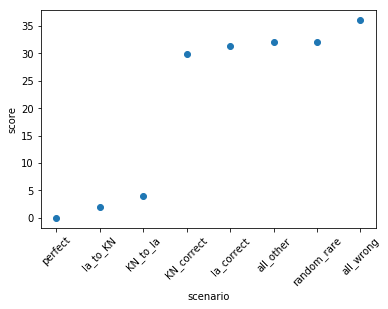

In [67]:
results = np.array([[1, m_perfect],
                    [4, m_Ia_to_KN],
                    [7, m_KN_to_Ia],
                    [10, m_KN_correct],
                    [13, m_Ia_correct],
                    [16, m_all_other],
                    [19, m_random_rare],
                    [22, m_all_wrong]])

import matplotlib.pylab as plt

plt.figure()
plt.scatter(results[:,0], results[:,1])
plt.xlabel('scenario')
plt.ylabel('score')
plt.xticks([1,4,7,10,13, 16, 19,22],['perfect', 'Ia_to_KN', 'KN_to_Ia', 'KN_correct','Ia_correct','all_other','random_rare','all_wrong'], rotation=45)
plt.savefig('Extreme_class.png')

In [69]:
print('Case \t \t \t \t \t  score')
print('Perfect classification: \t \t ', m_perfect)
print('\t All Ia classified as KN: \t ', m_Ia_to_KN)
print('\t All KN classified as Ia: \t ', m_KN_to_Ia)
print('Kilonova correct, everything else random:', m_KN_correct)
print('Ia correct, everything else random: \t ', m_Ia_correct)
print('All objects classified as "Other": \t ', m_all_other)
print('Random rare: \t \t \t \t ', m_random_rare)
print('All wrong: \t \t \t \t ', m_all_wrong)

Case 	 	 	 	 	  score
Perfect classification: 	 	  3.108624468950443e-15
	 All Ia classified as KN: 	  2.0024251882842847
	 All KN classified as Ia: 	  4.004850376568576
Kilonova correct, everything else random: 29.88963409538549
Ia correct, everything else random: 	  31.283621264788678
All objects classified as "Other": 	  32.03880301254857
Random rare: 	 	 	 	  32.097713363865736
All wrong: 	 	 	 	  36.043653389117146
